# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [27]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print(train['features'].shape)

(39209, 32, 32, 3)


In [28]:
# Load list of sign names

import csv
import os
dir = 'E:/Udacity/SDCND/Projects/P2/CarND-Traffic-Sign-Classifier-Project-master'

sign_names = []
with open(os.path.join(dir, 'signnames.csv')) as f:
    for line in f:
        index, signname = line.split(',')
        if index != 'ClassId':
            sign_names.append(signname)
print(len(sign_names))

43


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [29]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

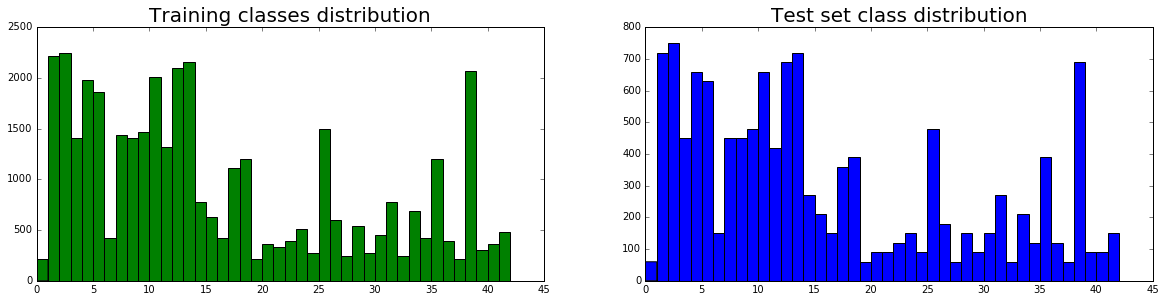

In [30]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

bins = [i for i in range(n_classes)]
fig = plt.figure(figsize=(20,10))
plt.subplot(223); a,b,c = plt.hist(y_train, bins=bins, color='green')
plt.title('Training classes distribution', fontsize=20)
plt.subplot(224); a1,b1,c1 = plt.hist(y_test, bins=bins)
plt.title('Test set class distribution', fontsize=20)

### A sample view of 25 signs from the training set

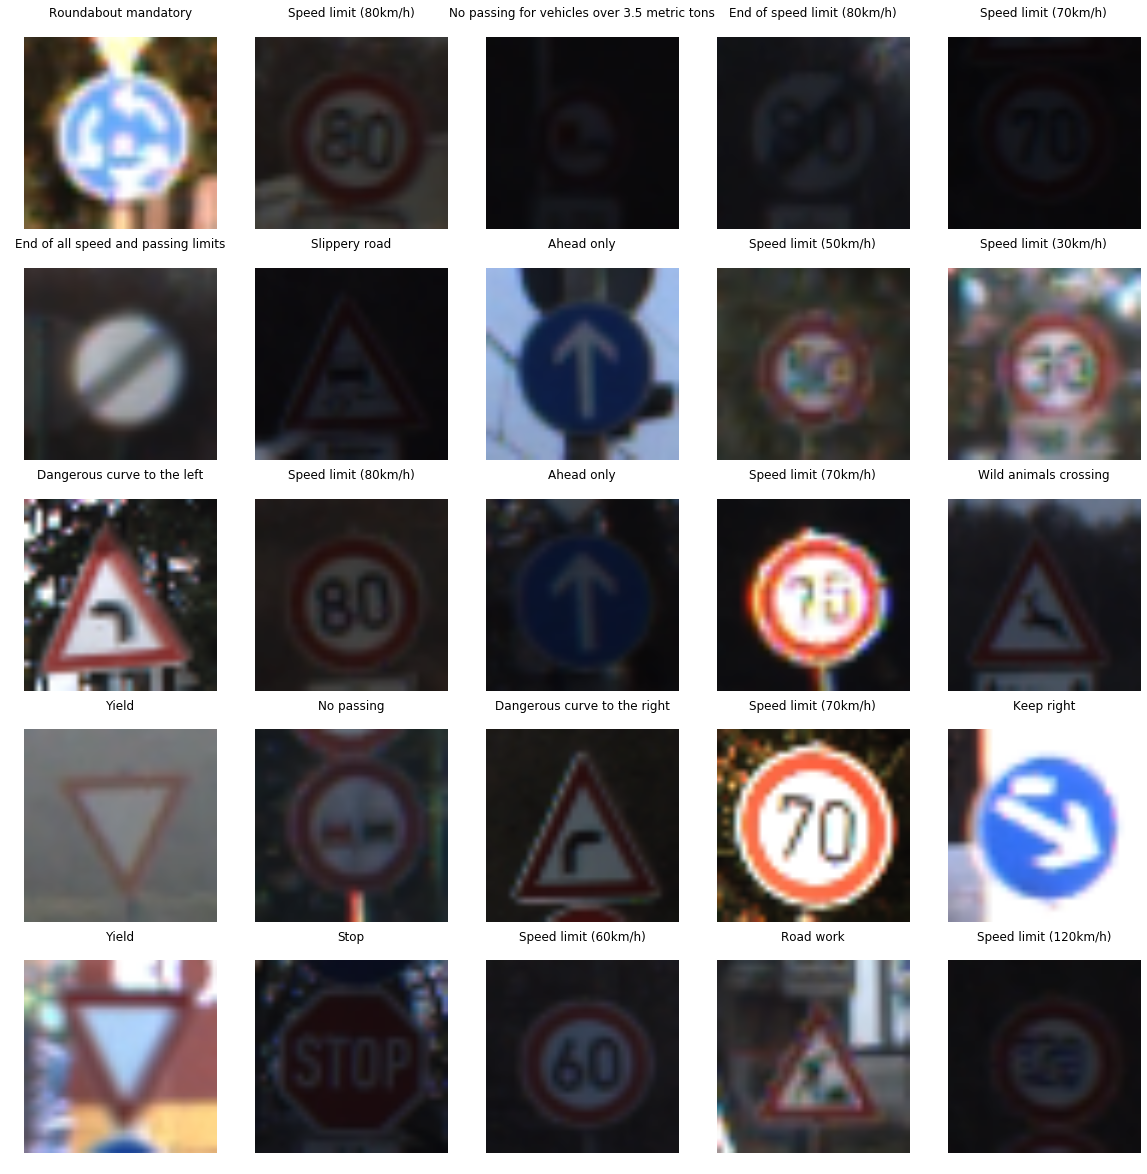

In [31]:
index = np.random.choice(n_train, size=25, replace=False)
fig = plt.figure(figsize=(20,20))
for i in range(len(index)):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[index[i]])
    plt.title(sign_names[y_train[index[i]]])
    plt.axis('off')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Pre-processing - Normalization
Normalize the values of the training and test dataset to values between 0 and 1.

In [32]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import numpy as np

def normalize_images(images):
    a = 0 #-0.5
    b = 1 #0.5
    image_max = np.max(images)
    image_min = np.min(images)
    return a + ((images - image_min)*(b - a) / (image_max - image_min))

print('Values Before Normalization:')
trn_min, trn_max = np.min(X_train), np.max(X_train)
tst_min, tst_max = np.min(X_test), np.max(X_test)
print('Train Min/Max: ({}/{}), Test Min/Max: ({}/{})'.format(trn_min, trn_max, tst_min, tst_max))

X_train = normalize_images(X_train)
X_test = normalize_images(X_test)
print('\nAfter normalization:')
trn_min, trn_max = np.min(X_train), np.max(X_train)
tst_min, tst_max = np.min(X_test), np.max(X_test)
print('Train Min/Max: ({}/{}), Test Min/Max: ({}/{})'.format(trn_min, trn_max, tst_min, tst_max))

Values Before Normalization:
Train Min/Max: (0/255), Test Min/Max: (0/255)

After normalization:
Train Min/Max: (0.0/1.0), Test Min/Max: (0.0/1.0)


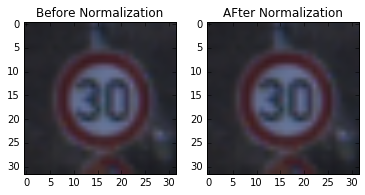

In [13]:
### Look at orginal vs normalized image
index = np.random.randint(0, n_train)
plt.subplot(121); plt.imshow(train['features'][index]); plt.title('Before Normalization')
plt.subplot(122); plt.imshow(X_train[index]); plt.title('AFter Normalization')

### Affine Transoformation - Data Augmentation

In [33]:
import cv2
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [34]:
def affine_transform(img):
    rows,cols,ch = img.shape
    i, j = 10, 20
    m = 4
    pts1 = np.float32([[i,i],[i,j],[j,i]])
    pts2 = np.float32([[i+int(m*(np.random.random()-0.5)), i+int(m*(np.random.random()-0.5))],
                       [i+int(m*(np.random.random()-0.5)), j+int(m*(np.random.random()-0.5))],
                       [j+int(m*(np.random.random()-0.5)), i+int(m*(np.random.random()-0.5))]])

    M = cv2.getAffineTransform(pts1,pts2)

    dst = cv2.warpAffine(img,M,(cols,rows))
    
    return dst

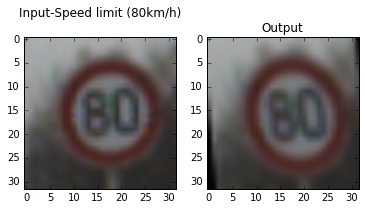

In [35]:
idx = np.random.choice(n_train)
img = X_train[idx]
lbl = y_train[idx]
img_at = affine_transform(img)
plt.subplot(121),plt.imshow(img),plt.title(str('Input-' + str(sign_names[lbl])))
plt.subplot(122),plt.imshow(img_at),plt.title('Output')
plt.show()

In [36]:
# For each class, count the number of images that are less than 500
# and for each of them calculate target_num as 501 - number of examples in that class.
# Now iterate over the target number times, picking an image at random
# and affine transform the image and append to the training list

# Progress bar
images_pbar = tqdm(range(n_classes), desc='Progress', unit='class')

for cls in images_pbar:
    cls_examples = sum(y_train==cls)
    if cls_examples < 501:
        target = 501 - cls_examples
        for i in range(target):
            pick_idx = np.random.choice(cls_examples)
            pick_img = X_train[y_train==cls][pick_idx]
            X_train = np.append(X_train, [affine_transform(pick_img)], axis=0)
            y_train = np.append(y_train, [cls], axis=0)

print('Augmented training data size and shape:')
print(X_train.shape, y_train.shape)

Progress: 100%|██████████████████████████████████████████████| 43/43 [26:42<00:00, 93.30s/class]


Augmented training data size and shape:
(42758, 32, 32, 3) (42758,)


#### Save the augmented training data to disk

In [38]:
pickle_file = 'newtrain.p'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('newtrain.p', 'wb') as pfile:
            pickle.dump(
                {
                    'newfeatures': X_train,
                    'newlabels': y_train,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


##### Load augmented train data

In [39]:
training_file = 'newtrain.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['newfeatures'], train['newlabels']
print('New X_train\'s shape = ', X_train.shape)

New X_train's shape =  (42758, 32, 32, 3)


##### Shuffle the data before splitting into train, validation and test data

In [40]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
"""
assert X_train.shape == train['features'].shape, 'X_train\'s shape changed - verify.'
assert y_train.shape == train['labels'].shape, 'y_train\'s shape changed - verify.'
assert not np.array_equal(X_train, train['features']), 'X_train not shuffled'
assert not np.array_equal(y_train, train['labels']), 'y_train not shuffled'
"""
assert X_train.shape == train['newfeatures'].shape, 'X_train\'s shape changed - verify.'
assert y_train.shape == train['newlabels'].shape, 'y_train\'s shape changed - verify.'
assert not np.array_equal(X_train, train['newfeatures']), 'X_train not shuffled'
assert not np.array_equal(y_train, train['newlabels']), 'y_train not shuffled'

print('Data shuffled successfully.')

Data shuffled successfully.


##### Visualize augmented train data
It should now have a minimum of 500 images for all classes in training set.
There is no change to the test set.

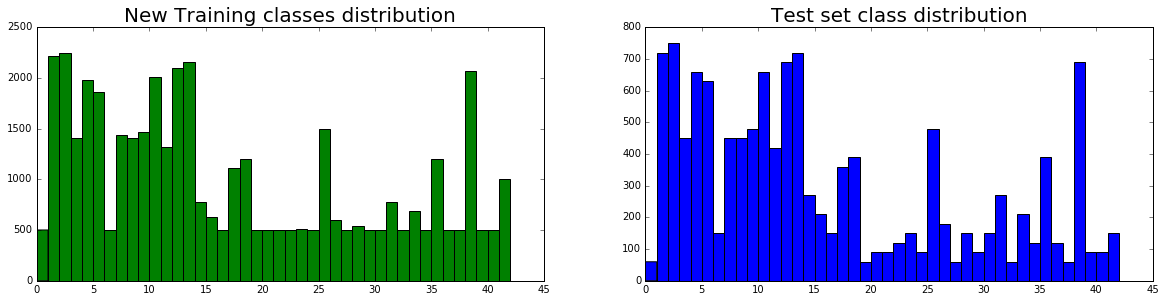

In [41]:
bins = [i for i in range(n_classes)]
fig = plt.figure(figsize=(20,10))
plt.subplot(223); a,b,c = plt.hist(y_train, bins=bins, color='green')
plt.title('New Training classes distribution', fontsize=20)
plt.subplot(224); a1,b1,c1 = plt.hist(y_test, bins=bins)
plt.title('Test set class distribution', fontsize=20)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Preprocessed data in two ways. First, normalized the entire data (train and test) to values between 0.0 and 1.0. This makes the calculations that follow efficient, mathematically.

Next, augmented data with some classes of images that are less than 500. Augmented data is created with affine transformation (image processing). Chose this method as this preserves many featues of the images such as lines, points and others and yet allowing me to create some distorted images that are only slightly different from original images.

##### Split test data into validation and test sets

Validation set size:  6315
Test set size:  6315


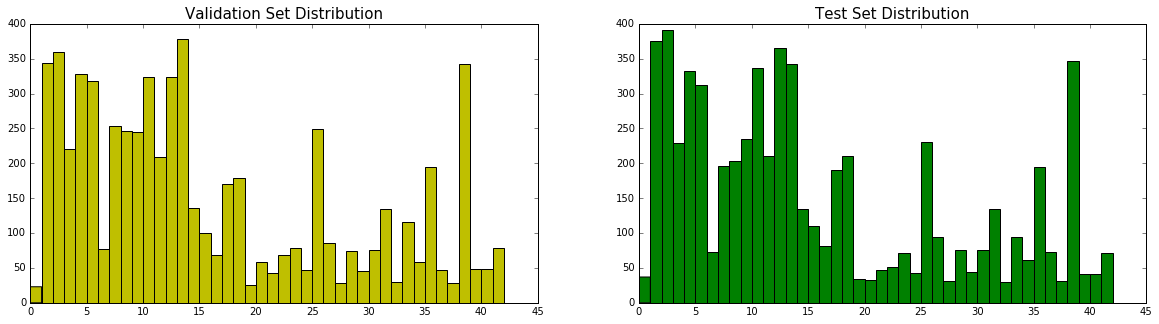

In [42]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.cross_validation import train_test_split

X_valid, X_test, y_valid, y_test = train_test_split(test['features'], test['labels'], test_size = 0.5)
print('Validation set size: ', len(X_valid))
print('Test set size: ', len(X_test))

fig = plt.figure(figsize=(20,5))
valid_plt = plt.subplot(121)
a,b,c = valid_plt.hist(y_valid, color='y', bins=bins)
valid_plt.set_title('Validation Set Distribution', fontsize=15)

test_plt = plt.subplot(122)
a1,b1,c1 = test_plt.hist(y_test, color='g', bins=bins)
test_plt.set_title('Test Set Distribution', fontsize=15)

X_valid = normalize_images(X_valid)
X_test = normalize_images(X_test)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Generated additional data (see above in augmentation) by affine transforming the images for classes that have less than 500 images in the original train dataset. Now all classes have a minimum of 500 samples. This helps in balancing the class distribution to a better extent (albeit not a perfect distribution/balance of all classes).

### Features and Labels declaration

In [45]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

learning_rate = 1e-3

x = tf.placeholder(dtype=tf.float32, shape=[None, 32, 32, 3])
y = tf.placeholder(dtype=tf.int32, shape=[None,])

### Build the Model

### Model 2

In [46]:
def model2(x):
    
    mu = 0
    sigma = 0.1
    
    print('Model2')
    
    # Convolutional Layer 1. Input = 32x32x3. Output = 26x26x100.
    #1conv1_W = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(7,7,3,100), mean=mu, stddev=sigma))
    conv1_W = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(5,5,3,100), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(100))
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1, 1, 1, 1], padding = 'VALID') + conv1_b
    
    # Activation: relu
    conv1 = tf.nn.relu(conv1)
    
    # Pooling Layer 1: Input = 26x26x100. Output = 13x13x100.
    pool1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding='VALID')
    
    # Convolution Layer 2: Input = 13x13x100. Output = 10x10x150
    conv2_W = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(4,4,100,150), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(150))
    conv2 = tf.nn.conv2d(pool1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation: relu
    conv2 = tf.nn.relu(conv2)
    
    # Pooling Layer 2: Input = 10x10x150. Output = 5x5x150.
    pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Convolutional Layer 3: Input = 5x5x150. Output = 2x2x250.
    conv3_W = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(4, 4, 150, 250), mean=mu, stddev=sigma))
    conv3_b = tf.Variable(tf.zeros(250))
    conv3 = tf.nn.conv2d(pool2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Activation: relu
    conv3 = tf.nn.relu(conv3)
    
    # Pooling Layer 3. Input = 5x5x250. Output = 1x1x250.
    pool3 = tf.nn.max_pool(conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # Flatten.
    fc0 = flatten(pool3)
    
    # Fully Connected Layer 1: Input = 250. Output = 250.
    fc1_W = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(250,250), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(250))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation: relu
    fc1 = tf.nn.relu(fc1)
    
    # L2 Regularization 1.
    regu1 = tf.nn.l2_loss(fc1_W)
    
    # Dropout. Prob = 0.5. Input = 250. Output = 250.
    dropout1 = tf.nn.dropout(fc1, keep_prob=0.5)
    
    # Fully Connected Layer 2: Input = 250. Output = 300.
    fc2_W = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(250, 300), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(300))
    fc2 = tf.matmul(dropout1, fc2_W) + fc2_b
    
    # Activation: relu
    fc2 = tf.nn.relu(fc2)
    
    # L2 Regularization 2
    regu2 = tf.nn.l2_loss(fc2_W)
    
    # Dropout 2: Prob = 0.5. Input = 300. Output = 300.
    dropout2 = tf.nn.dropout(fc2, keep_prob=0.5)
    
    #Fully COnnected Layer: 2.5. Input = 300. Output = 150.
    #fc25_W = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(300, 150), mean=mu, stddev=sigma))
    #fc25_b = tf.Variable(tf.zeros(150))
    #fc25 = tf.matmul(dropout2, fc25_W) + fc25_b
    
    # Activation: relu
    #fc25 = tf.nn.relu(fc25)
    
    # Logits Layer: Input = 300. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(300, 43), mean=mu, stddev=sigma))
    #fc3_W = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(150, 43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    
    logits = tf.matmul(dropout2, fc3_W) + fc3_b
    regularizers = regu1 + regu2
    
    # Display model
    print('conv1: ', conv1.get_shape())
    print('pool1: ', pool1.get_shape())
    print('conv2: ', conv2.get_shape())
    print('pool2: ', pool2.get_shape())
    print('conv3: ', conv3.get_shape())
    print('pool3: ', pool3.get_shape())
    print('fc0: ', fc0.get_shape())
    print('fc1: ', fc1.get_shape())
    print('regu1: ', regu1.get_shape())
    print('dropout1: ', dropout1.get_shape())
    print('fc2: ', fc2.get_shape())
    #print('fc25: ', fc25.get_shape())
    print('logits: ', logits.get_shape())

    return regularizers, logits

regularizers, logits = model2(x)

Model2
conv1:  (?, 28, 28, 100)
pool1:  (?, 14, 14, 100)
conv2:  (?, 11, 11, 150)
pool2:  (?, 5, 5, 150)
conv3:  (?, 2, 2, 250)
pool3:  (?, 1, 1, 250)
fc0:  (?, 250)
fc1:  (?, 250)
regu1:  ()
dropout1:  (?, 250)
fc2:  (?, 300)
logits:  (?, 43)


### Model Pipeline

In [47]:
# beta, the regularization constant
beta = 0.01

y_one_hot = tf.one_hot(y, n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
loss = tf.reduce_mean(cross_entropy)
loss = (loss + (beta * regularizers))
train_operation = tf.train.AdamOptimizer(learning_rate=learning_rate)
#train_operation = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
optimizer = train_operation.minimize(loss)

### Model Evaluation

In [48]:
prediction_labels = tf.argmax(logits, 1)
prediction = tf.equal(prediction_labels, tf.argmax(y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

def eval_data(X, yin):
    num_batches = X.shape[0] // BATCH_SIZE
    num_examples = len(X) #num_batches * BATCH_SIZE
    #print('num examples: ', num_examples)
    total_acc, total_loss = 0, 0
    sess = tf.get_default_session()
    for step in range(0, num_examples, BATCH_SIZE):
        end = step + BATCH_SIZE
        batch_x, batch_y = X[step:end], yin[step:end]
        loss_bat, acc = sess.run([loss, accuracy], feed_dict={x: batch_x, y: batch_y})
        #print('loss/acc/mult: {};  {}; {}'.format(loss_bat, acc, batch_x.shape[0]))
        total_acc += (acc * len(batch_x))
        total_loss += (loss_bat * len(batch_x))
        #print('totloss: ', total_loss)
    return total_loss/num_examples, total_acc/num_examples

def eval_loss(X, labels):
    num_examples = len(X)
    tot_loss = 0
    sess = tf.get_default_session()
    for step in range(0, num_examples, BATCH_SIZE):
        end = step + BATCH_SIZE
        batch_x, batch_y = X[step:end], labels[step:end]
        batch_loss = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        tot_loss += (batch_loss * len(batch_x))
        
    return tot_loss/num_examples

def eval_acc(X, labels):
    num_examples = len(X)
    tot_acc = 0
    sess = tf.get_default_session()
    for step in range(0, num_examples, BATCH_SIZE):
        end = step + BATCH_SIZE
        batch_x, batch_y = X[step:end], labels[step:end]
        batch_acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
        tot_acc += (batch_acc * len(batch_x))
        
    return tot_acc/num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Initially I implemented and played with the original LeNet architecture to I get a feel of the models. Once I gained a fair intution of how the CNNs and Pooling layers work, I built my own architecture. Initially, my model suffered from overfitting - the loss on training data consitently went down with each epoch. The validation loss declined for initial few epochs and increased with later epochs. Thanks to my mentor who pointed me to some wonderful articles and published papers. I implemented regularization and dropout layers plus, increased the depth of each layer to have more maps to help capture features better. The model showed a great improvement on train and validation loss. Same can be noticed from chartes below here after the model is trained. The model and each layers' details can be seen printed below the Model2 (please refer above - Model2).


#### Architecture of Model2

* Input (32x32x3)
* Conv Layer1 (5x5x3 filter, stride 1, padding 'Valid' to 28x28x100)
* Activation: Relu
* maxpool1 (2x2 kernal, 2x2 stride, padding 'Valid' to 14x14x100)
* Conv Layer2 (4x4x100 filter, stride 1, padding 'Valid' to 11x11x150)
* Activation: Relu
* maxpool2 (2x2 kernel, 2x2 stride, padding 'Valid' to 5x5x150)
* Conv Layer3 (4x4x150 filter, stride 1, padding 'Valid' to 2x2x250)
* Activation: Relu
* maxpool3 (2x2 kernel, 2x2 stride, padding 'Valid' to 1x1x250)
* Flatten (250 nodes)
* Fully connected layer1 (with added dropout and L2 regularization) (250 -> 250)
* Fully connected layer2 (with added dropout and L2 regularization) (250 -> 300)
* Logits (output) (300 -> 43)

In [49]:
epochs = 10
display_step = 1
import time
start_time = time.time()
train_loss, valid_loss, train_acc, valid_acc = [], [], [], []
epoc = []
init = tf. global_variables_initializer()
BATCH_SIZE = 256
n_batches = n_train // BATCH_SIZE
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    print('epochs=', epochs, '; BATCH SIZE=', BATCH_SIZE, '; learning rate=', learning_rate)
    print('Training initiated...')
    print('\nEPOCH\tvalid loss\tvalid acc\telapsed time')
    for epoch in range(epochs):
        for batch in range(0, n_train, BATCH_SIZE):
            end = batch + BATCH_SIZE
            x_batch, y_batch = X_train[batch:end], y_train[batch:end]
            sess.run(optimizer, feed_dict={x: x_batch, y: y_batch})
        
        if epoch % display_step == 0:
            elapsed_time = time.time() - start_time
            tr_loss, tr_acc = eval_data(X_train, y_train)
            train_loss.append(tr_loss)
            train_acc.append(tr_acc)
            v_loss = eval_loss(X_valid, y_valid)
            v_acc = eval_acc(X_valid, y_valid)
            epoc.append(epoch+display_step)
            valid_loss.append(v_loss)
            valid_acc.append(v_acc)
            print('{}\t{:.3f}\t\t{:.3f}\t\t{:.2f} mins'.format(epoch+display_step, v_loss, v_acc, elapsed_time/60))
    
    print('\ntest accuracy: {:.3f}'.format(eval_acc(X_test, y_test)))
    saver.save(sess, '/Udacity/SDCND/Projects/P2/CarND-Traffic-Sign-Classifier-Project-master/models/model2')
    
print('total time:{:.2f}mins'.format((time.time() - start_time)/60))
print('Training complete and model saved')

epochs= 10 ; BATCH SIZE= 256 ; learning rate= 0.001
Training initiated...

EPOCH	valid loss	valid acc	elapsed time
1	3.730		0.411		0.94 mins
2	1.916		0.746		2.20 mins
3	1.233		0.849		3.47 mins
4	0.928		0.879		4.73 mins
5	0.762		0.893		6.00 mins
6	0.649		0.912		7.26 mins
7	0.612		0.906		8.52 mins
8	0.560		0.911		9.78 mins
9	0.488		0.922		11.04 mins
10	0.498		0.917		12.29 mins

test accuracy: 0.931
total time:12.73mins
Training complete and model saved


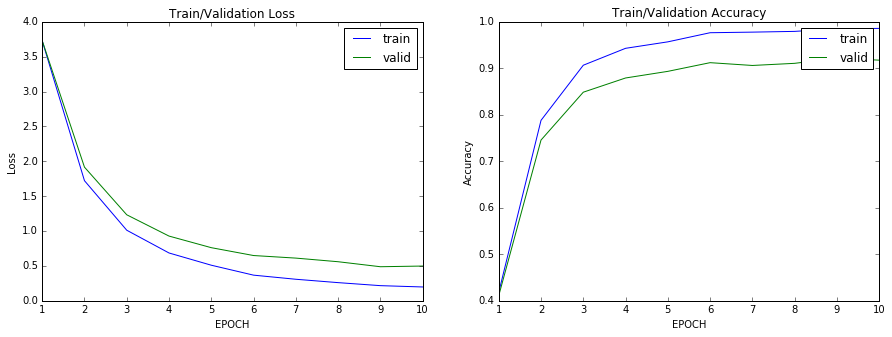

In [50]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(epoc, train_loss)
plt.plot(epoc, valid_loss)
plt.legend(['train', 'valid'])
plt.title('Train/Validation Loss')
plt.ylabel('Loss')
plt.xlabel('EPOCH')

plt.subplot(1,2,2)
plt.plot(epoc, train_acc)
plt.plot(epoc, valid_acc)
plt.legend(['train', 'valid'])
plt.title('Train/Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('EPOCH')

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Trained model with AdamOptimizer as it quickly converges after about 10 epochs. Considering the RAM on my GPU and model architecture, a batch size of 256 worked well. Any larger batch size at times fails to load as the RAM isn't sufficient. I also saw a slight improvement on accuracy when changed batch size from 128 to 256. So a take-away is the larger the batch size, the sooner the optimization would converge. 

Observed that, the model converges decently for an epoch range of 10-15. Anything beyond that, there wasn't a greater improvement in accuracy - for this model. The other hyper parameter was the learning rate. The smaller it is, it usually required larger epochs it required to show convergence - although, this cannot be assertained as a rule of thumb.

Experimented with optimizers GradientDescent and Adam. Adam quickly converged even with 10 epochs and a fair learning rate. Also referring to resources and CS231N notes, noted that Adam is by far the default optimizer currently. Hence the choice.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
Initially to verify my code, ran with a very flat net with just one layer and one fully connected layer. Noticed that both validation and test accuracies were very low and model didn't learn even with more training data.
But when the network layers are made deep, there is a sharp increase in learning and acuuracy levels even with very little data.

Also played with several convolutional and pooling window sizes and various depth sizes. Gained a fair intuition. One observation (my case) seemed the window sizes had less affect than the layer depths. It appears, the larger the layers' depth, the better the model performed.

Adding regularization and dropout layers helped models from overfitting. Thus the validation accuracy improved and so did the test accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [51]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

path = 'E:/Udacity/SDCND/Projects/P2/CarND-Traffic-Sign-Classifier-Project-master/myNewSigns'
imgs_list = os.listdir(path)
my_test = {}
features = []

mylabels = [38, 1, 1, 25, 25, 12, 14, 14, 14, 26]
mylabels = np.array(mylabels)

for i, image in enumerate(os.listdir(path)):
    img = mpimg.imread(os.path.join(path, image))
    features.append(img)

features = normalize_images(features)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Observed that the initial training set has a lot of images with very less contrast, in other words very dark. Since all my images are very bright, I suspect this may be a quality that can make classification difficult.

Also deliberately chose some distorted images to see how the classifier predicts. Plus wanted to test if brighter and darker images of same sign would prove a major difficulty for the model to predict correctly. See images below.

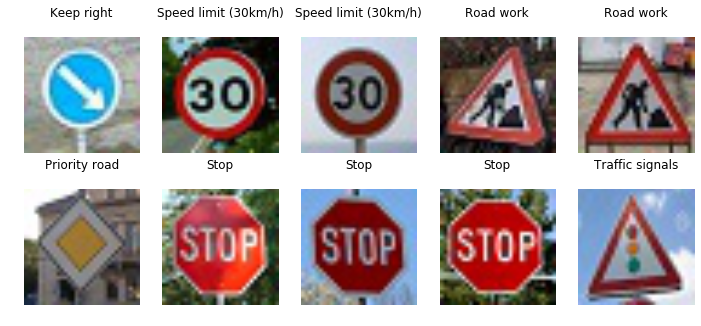

In [52]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

fig = plt.figure(figsize=(12,5))
for i, image in enumerate(features):
    #img = mpimg.imread(os.path.join(path, image))
    #features.append(img)
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.title(sign_names[mylabels[i]])
    plt.axis('off')
    
features = normalize_images(features)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The test accuracy (seen above) stands at 93%. While my captured pictures' accuracy currently is at 80%, I've noticed it fluctuating between 70-80%. This can imply that the model is overfitting to the train dataset, and can further be improved for generalization.

Of things that can be done to address overfitting train data, below can be tried:
1. Experiment with higher values for dropout keep_proba
2. Add another deeper layer and a dropout layer.
3. Consider adding other L2 regularization layer (but from papers, empericially this is less effective to dropout).
4. Augment data with higher contrast images as this probably is one reason, for less accuracy on my captured images. Captured image set has higher contrast compared to a lot of train set pictures....

In [53]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, '/Udacity/SDCND/Projects/P2/CarND-Traffic-Sign-Classifier-Project-master/models/model2')

top_k = tf.nn.top_k(logits, 3)

my_signs_acc, my_signs_pred, my_signs_pred_labels, top3 = sess.run([accuracy, prediction_labels, prediction, top_k], feed_dict={x: features, y:mylabels})    
print('Accuracy on captured signs = {:.3f}'.format(my_signs_acc))

print('Actual labels:\t', mylabels)
print('Pred labels:\t', my_signs_pred)
print('Status: ', my_signs_pred_labels)

Accuracy on captured signs = 0.800
Actual labels:	 [38  1  1 25 25 12 14 14 14 26]
Pred labels:	 [38  0  1 25 25 12 14 14 14 22]
Status:  [ True False  True  True  True  True  True  True  True False]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Looking at the top 3 predictions, the model is able to correctly predict the classes among top 3. In most cases, the model is certain with its initial prediction. Cases where the model didn't get it in initial prediction, the correct prediction appeared in top 3. However, in some cases the model did fail to predict correct class in top 3 also.

This could be because most of captured images are bright and a majority of training images are darker and this posed difficulty for model to identify some of the featues. Other preprocessing activities such as histogram normalization or increasing the training set contrast may help improve the prediction. This can be experimented and tested.


	Test Image		Prediction		Top 3 Predictions with Top 3 Values
	==========		==========		===================================


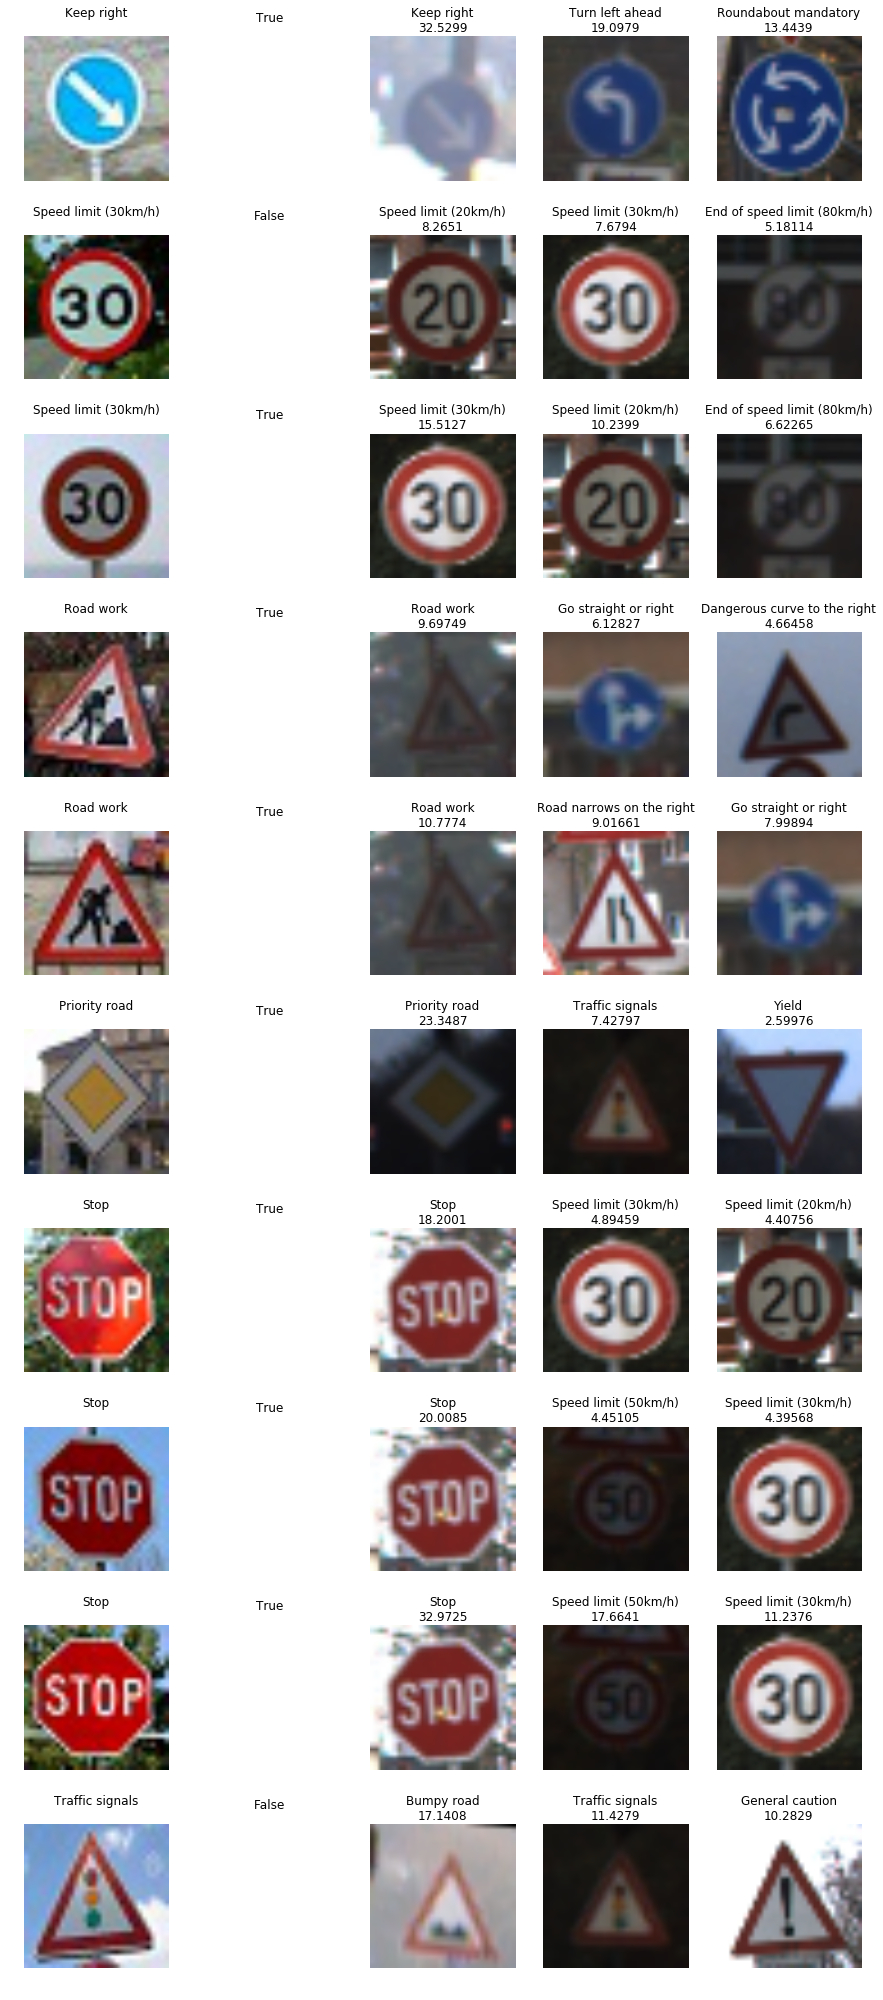

In [54]:
# Display the input traffic sign followed by the top three predicted signs
# along with their values in a grid.

fig = plt.figure(figsize=(15,35)); plt.axis('off')
print('\n\tTest Image\t\tPrediction\t\tTop 3 Predictions with Top 3 Values')
print('\t==========\t\t==========\t\t===================================')
for i in range(len(mylabels)):
    #image = mpimg.imread(os.path.join(path, imgs_list[i]))
    plt.subplot(10,5,i*5+1); plt.imshow(features[i]); plt.title(sign_names[mylabels[i]]); plt.axis('off')
    plt.subplot(10,5,i*5+2); plt.axis('off'); plt.title(my_signs_pred_labels[i])
    plt.subplot(10,5,i*5+3); plt.imshow(X_train[y_train == top3.indices[i][0]][1]); plt.title(sign_names[top3.indices[i][0]] + str(top3.values[i][0])); plt.axis('off')
    plt.subplot(10,5,i*5+4); plt.imshow(X_train[y_train == top3.indices[i][1]][1]); plt.title(sign_names[top3.indices[i][1]] + str(top3.values[i][1])); plt.axis('off')
    plt.subplot(10,5,i*5+5); plt.imshow(X_train[y_train == top3.indices[i][2]][1]); plt.title(sign_names[top3.indices[i][2]] + str(top3.values[i][2])); plt.axis('off')

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.